In [22]:
import numpy as np
import pandas as pd

df = pd.read_csv("car.data")

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [23]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Text(0.5, 1.0, 'Label')

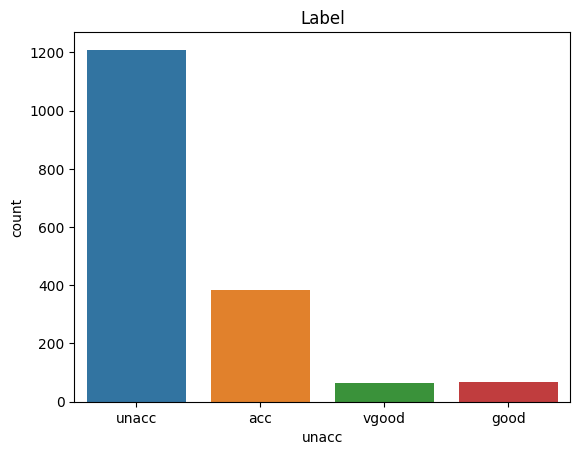

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="unacc")
plt.title("Label")

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for _ in df.columns:
    df[_] = le.fit_transform(df[_])

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [26]:
y = df['unacc']
X = df.drop('unacc', axis=1)

In [27]:
from keras.utils import to_categorical

# 원-핫 인코딩
y = to_categorical(y)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape

(1381, 6)

In [38]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                140       
                                                                 
 dense_17 (Dense)            (None, 12)                252       
                                                                 
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dense_19 (Dense)            (None, 4)                 52        
                                                                 
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [39]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=3, validation_data= (X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
461/461 [==============================] - 1s 854us/step - loss: 0.7977 - accuracy: 0.7140 - val_loss: 0.8218 - val_accuracy: 0.6416
Epoch 2/100
461/461 [==============================] - 0s 657us/step - loss: 0.6713 - accuracy: 0.7169 - val_loss: 0.8272 - val_accuracy: 0.6416
Epoch 3/100
461/461 [==============================] - 0s 659us/step - loss: 0.6035 - accuracy: 0.7299 - val_loss: 0.6803 - val_accuracy: 0.6474
Epoch 4/100
461/461 [==============================] - 0s 657us/step - loss: 0.5182 - accuracy: 0.7552 - val_loss: 0.5870 - val_accuracy: 0.7052
Epoch 5/100
461/461 [==============================] - 0s 659us/step - loss: 0.4357 - accuracy: 0.8117 - val_loss: 0.4469 - val_accuracy: 0.7919
Epoch 6/100
461/461 [==============================] - 0s 659us/step - loss: 0.3704 - accuracy: 0.8479 - val_loss: 0.4426 - val_accuracy: 0.7803
Epoch 7/100
461/461 [==============================] - 0s 659us/step - loss: 0.3326 - accuracy: 0.8639 - val_loss: 0.3608 - val_ac

461/461 [==============================] - 0s 674us/step - loss: 0.0668 - accuracy: 0.9747 - val_loss: 0.0812 - val_accuracy: 0.9798
Epoch 58/100
461/461 [==============================] - 0s 654us/step - loss: 0.0483 - accuracy: 0.9819 - val_loss: 0.0905 - val_accuracy: 0.9624
Epoch 59/100
461/461 [==============================] - 0s 657us/step - loss: 0.0528 - accuracy: 0.9804 - val_loss: 0.0820 - val_accuracy: 0.9682
Epoch 60/100
461/461 [==============================] - 0s 707us/step - loss: 0.0586 - accuracy: 0.9776 - val_loss: 0.0600 - val_accuracy: 0.9798
Epoch 61/100
461/461 [==============================] - 0s 686us/step - loss: 0.0491 - accuracy: 0.9819 - val_loss: 0.1006 - val_accuracy: 0.9682
Epoch 62/100
461/461 [==============================] - 0s 671us/step - loss: 0.0532 - accuracy: 0.9797 - val_loss: 0.0900 - val_accuracy: 0.9682
Epoch 63/100
461/461 [==============================] - 0s 664us/step - loss: 0.0536 - accuracy: 0.9804 - val_loss: 0.0646 - val_accuracy

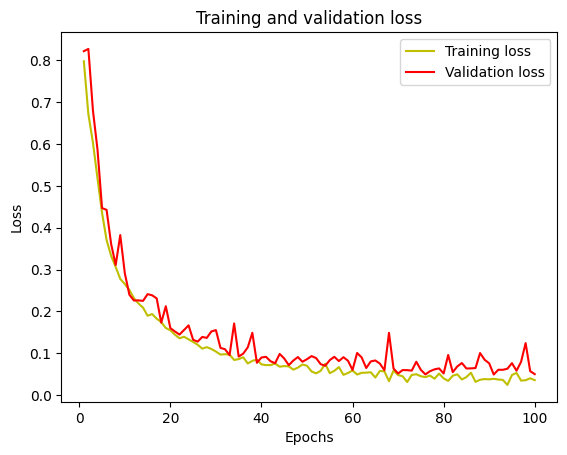

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.94      0.94      0.94        16
           2       1.00      0.98      0.99       222
           3       1.00      1.00      1.00        10

    accuracy                           0.98       346
   macro avg       0.97      0.98      0.97       346
weighted avg       0.98      0.98      0.98       346

[[ 97   1   0   0]
 [  1  15   0   0]
 [  5   0 217   0]
 [  0   0   0  10]]
